# Lecture 12의 데모

### Lecture 12의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec19.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec20.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Comparing Two Samples**

In [4]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [6]:
def ounces_to_kg(ounces):
  return ounces*0.02835

In [7]:
births_weight=births.apply(ounces_to_kg,'Birth Weight')

In [20]:
births = births.drop('Birth Weight').with_column('Birth Weight',births_weight)
births

Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,Birth Weight
284,27,62,100,False,3.402
282,33,64,135,False,3.20355
279,28,64,115,True,3.6288
282,23,67,125,True,3.0618
286,25,62,93,False,3.8556
244,33,62,178,False,3.9123
245,23,65,140,False,3.7422
289,25,62,125,False,3.402
299,30,66,136,True,4.05405
351,27,68,120,False,3.969


In [21]:
smoking_and_birthweight=births.select('Maternal Smoker','Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,3.402
False,3.20355
True,3.6288
True,3.0618
False,3.8556
False,3.9123
False,3.7422
False,3.402
True,4.05405
False,3.969


In [22]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


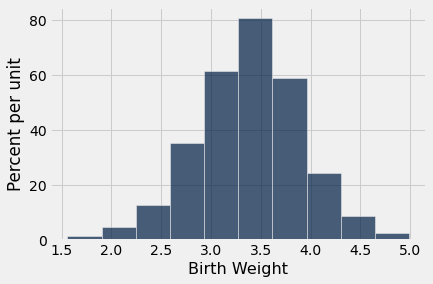

In [23]:
smoking_and_birthweight.hist('Birth Weight')

## **Test Statistic**

In [24]:
means_table=smoking_and_birthweight.group('Maternal Smoker',np.average)#담배를 안피면 좀 더 큼
means_table

Maternal Smoker,Birth Weight average
False,3.48947
True,3.22677


In [25]:
means=means_table.column(1)
observed_difference=means.item(1)-means.item(0)
observed_difference

-0.26269514191690657

In [26]:
def difference_of_means(table, numerical_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group variable

    Returns: Difference of means of the two groups
    """

    # table with the two relevant columns
    reduced=table.select(numerical_label,group_label)

    # table containing group means
    means_table=reduced.group(group_label,np.average)

    # array of group means
    means=means_table.column(1)

    # return the difference of means
    return means.item(1)-means.item(0)


In [27]:
difference_of_means(births,'Birth Weight','Maternal Smoker')

-0.26269514191690657

## **Random Permutation (Shuffling)** ##

In [28]:
letters=Table().with_column('Letter',make_array('a','b','c','d','e'))
letters

Letter
a
b
c
d
e


In [29]:
letters.sample(2)# 뽑고 집어넣고 다시 하나 뽑고

Letter
c
b


In [30]:
letters.sample(2,with_replacement=False)#비복원 추출

Letter
d
e


In [32]:
letters.sample(5)

Letter
e
d
a
b
a


In [33]:
letters.sample(with_replacement=False).column('Letter')

array(['c', 'e', 'b', 'a', 'd'],
      dtype='<U1')

In [34]:
letters.with_column('Shuffled',letters.sample(with_replacement=False).column('Letter'))

Letter,Shuffled
a,d
b,b
c,a
d,c
e,e


--> Lecture Note로 돌아감

## **Simulation Under Null Hypothesis**

In [36]:
smoking_and_birthweight


Maternal Smoker,Birth Weight
False,3.402
False,3.20355
True,3.6288
True,3.0618
False,3.8556
False,3.9123
False,3.7422
False,3.402
True,4.05405
False,3.969


In [38]:
shuffled_labels = smoking_and_birthweight.sample(
    with_replacement=False).column('Maternal Smoker')
shuffled_labels

array([ True, False,  True, ..., False,  True,  True], dtype=bool)

In [40]:
original_and_shuffled=smoking_and_birthweight.with_column(
    'Shuffled Label',shuffled_labels
)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,3.402,True
False,3.20355,False
True,3.6288,True
True,3.0618,False
False,3.8556,True
False,3.9123,False
False,3.7422,False
False,3.402,False
True,4.05405,False
False,3.969,True


In [41]:
difference_of_means(original_and_shuffled,'Birth Weight','Maternal Smoker')

-0.26269514191690657

In [42]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

0.011429753187988112

## **Permutation Test**

In [43]:
def one_simulated_difference(table, numerical_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group variable

    Returns: Difference of means of the two groups after shuffling labels
    """

    # get the array of shuffled labels
    shuffled_labels=table.sample(with_replacement=False).column(group_label)

    # table of numerical column & shuffled column
    shuffled_table=table.with_column('Shuffled Label',shuffled_labels)
    return difference_of_means(shuffled_table,numerical_label,'Shuffled Label')
    

In [45]:
one_simulated_difference(births,'Birth Weight','Maternal Smoker')

-0.021732969971204774

In [46]:
differences=make_array()

for i in np.arange(2500):
  new_difference=one_simulated_difference(births,'Birth Weight','Maternal Smoker')
  differences=np.append(differences,new_difference)

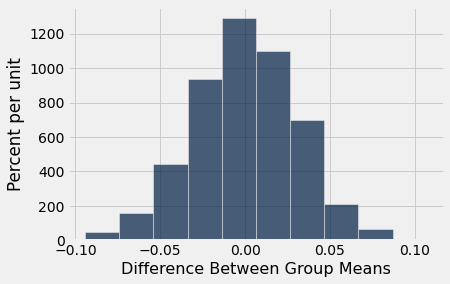

In [47]:
diff_tbl=Table().with_column('Difference Between Group Means',differences)
diff_tbl.hist()

In [49]:
diff_tbl.where('Difference Between Group Means', are.below(observed_difference)
). num_rows / diff_tbl.num_rows

0.0

## **Randomized Control Experiment**

* 무작위 대조 시험(randomized control trial; RCT)으로 보툴리눔 독소 A(Botulinum Toxin A; BTA)를 치료제로 사용하는 효과를 조사

* 요통이 있는 31명의 환자를 치료 그룹 및 통제 그룹으로 무작위로 나누어, 15명은 치료 그룹에, 16명은 통제 그룹에

* 대조군에게는 정상적인 식염수를 투여

* 실험은 의사나 환자 모두 그들이 어느 그룹에 속해 있는지 알 수 없도록 double blind로 실행

* 연구 시작 8주 후, 치료 그룹의 15명 중 9명과 대조 그룹의 16명 중 2명이 통증 완화

In [50]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [51]:
botox.pivot('Result','Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [52]:
botox.group('Group',np.average)

Group,Result average
Control,0.125
Treatment,0.6


## **Testing the Hypothesis**

In [53]:
observed_diff=difference_of_means(botox,'Result','Group')
observed_diff

0.475

In [54]:
one_simulated_difference(botox,'Result','Group')

0.3458333333333333

In [55]:
simulated_diffs=make_array()

for i in np.arange(10000):
  sim_diff=one_simulated_difference(botox,'Result','Group')
  simulated_diffs=np.append(simulated_diffs,sim_diff)
  

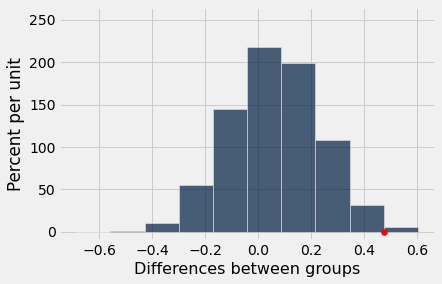

In [56]:
col_name = 'Differences between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.ylim(-0.1, 2.65)
plots.scatter(observed_diff, 0, c='red',zorder=3)

In [57]:
sum(simulated_diffs>=observed_diff)/len(simulated_diffs)

0.0068999999999999999